In [3]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import irtemp
import edge_detection as ed
import pixel_analysis as pa

## PART A:
### The temperature profile of the samples and plate is determined by detecting the edges, filling and labeling them, and monitoring the temperature at their centroids.

#### Use the function 'edge_detection.input_file' to load the input file

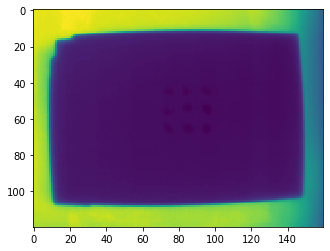

In [4]:
frames = ed.input_file('../musicalrobot/data/10_17_19_PPA_Shallow_plate.tiff')
plt.imshow(frames[0])

#### Crop the input file if required to remove the noise and increase the accuracy of edge detection

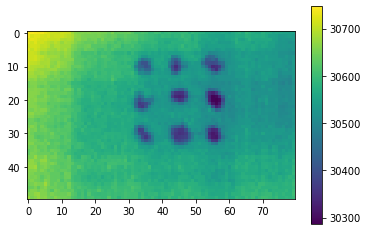

In [5]:
crop_frame = []
for frame in frames:
    crop_frame.append(frame[35:85,40:120])
plt.imshow(crop_frame[0])
plt.colorbar()

#### Use the wrapping function edge_detection.inflection_temp 

In [8]:
# Using the wrapping function
sorted_regprops, s_temp, p_temp, inf_temp, m_df = ed.inflection_temp(crop_frame, 3, 3)

In [9]:
sorted_regprops[0]

Row  Column  Plate_temp(cK)    Radius  Plate_coord  Area  \
unique_index                                                              
36.0           9.0    34.0         30562.0  2.820948    39.820948  25.0   
59.0          21.0    33.0         30528.0  2.705758    38.705758  23.0   
17.0          30.0    34.0         30544.0  2.931615    39.931615  27.0   
9.0            9.0    43.0         30528.0  2.705758    48.705758  23.0   
1.0           18.0    45.0         30534.0  2.705758    50.705758  23.0   
87.0          30.0    45.0         30497.0  3.241022    51.241022  33.0   
90.0           9.0    55.0         30526.0  3.141275    61.141275  31.0   
71.0          19.0    55.0         30526.0  2.985411    60.985411  28.0   
44.0          30.0    55.0         30524.0  2.646284    60.646284  22.0   

                  Perim  Sample_temp(cK)  
unique_index                              
36.0          15.656854          30406.0  
59.0          14.828427          30366.0  
17.0          17.071068          30376.0  
9.0           15.071068          30430.0  
1.0           14.828427          30350.0  
87.0          18.242641          30359.2  
90.0          18.485281          30394.4  
71.0          17.656854          30291.0  
44.0          14.242641          30317.0

#### Plotting the locations at which the temperature was recorded

Text(0.5, 1.0, 'Sample centroid and plate locations at which the temperature profile is monitored')

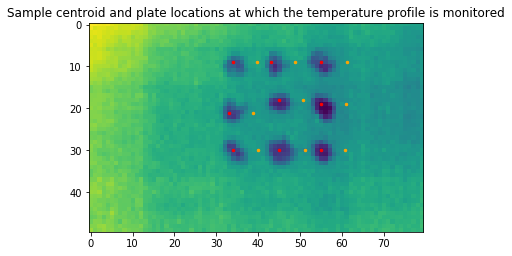

In [11]:
# Plotting the original image with the samples
# and centroid and plate location
plt.imshow(crop_frame[0])
plt.scatter(sorted_regprops[0]['Plate_coord'],sorted_regprops[0]['Row'],c='orange',s=6)
plt.scatter(sorted_regprops[0]['Column'],sorted_regprops[0]['Row'],s=6,c='red')#the origin location of the samples
plt.title('Sample centroid and plate locations at which the temperature profile is monitored')

Text(0.5, 1.0, 'Temperature of the sample against the temperature of the plate')

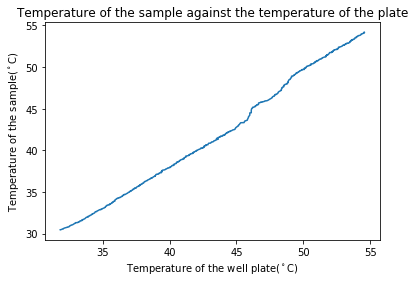

In [12]:
# Plotting the temperature profile of a sample against the temperature profile
# of the plate at a location next to the sample.
plt.plot(p_temp[5],s_temp[5])
plt.ylabel('Temperature of the sample($^\circ$C)')
plt.xlabel('Temperature of the well plate($^\circ$C)')
plt.title('Temperature of the sample against the temperature of the plate')

## Part B:
* The temperature profile of the samples and the plate is obtained by summing the pixel values over individual rows and columns, finding the troughs in the array of all the column and row sums.
* The temperature profile is then obtained by monitoring the temperature value at the intersection of peak values in the column and row sums. 

#### Load the input file as frames

#### Use the function irtemp.pixel_temp to get the temperature of the samples and at plate locations next to the samples in every frame of the input video.

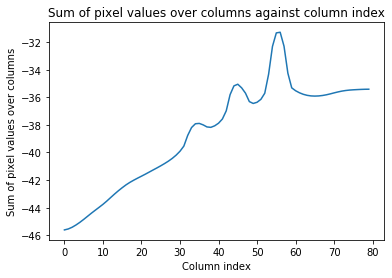

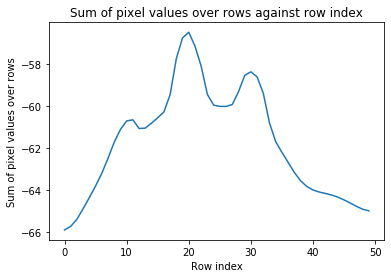

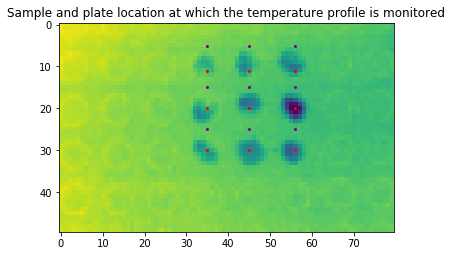

In [13]:
m_df = pa.pixel_temp(crop_frame,len(crop_frame),n_columns = 3, n_rows = 3)